In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
data = scipy.io.loadmat('4x4x4x32x8_raw/4x4x4x32x8_raw.mat')['Data']

In [3]:
resp = data[0][0][0]
param = data[0][0][1]
ch2xy = param[:32,[-2,-1]].astype(int) -1

In [4]:
param.shape

(2048, 7)

In [5]:
resp.shape

(8, 4, 2048)

In [10]:
np.unique(param[:,0])


array([100.00000149, 200.00000298, 300.00001192, 400.00000596])

In [11]:
np.unique(param[:,1])

array([100., 200., 300., 400.])

In [12]:
np.unique(param[:,2])

array([ 20.,  40., 100., 200.])

In [13]:
np.unique(param[:,3])

array([ 3.,  5.,  7.,  9., 11., 13., 17., 21., 31., 41., 61., 81.])

In [14]:
np.unique(param[:,4])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [19]:
np.unique(param[:,5])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [18]:
np.unique(param[:,6])

array([1., 2., 3., 4.])

### Noise

#### w.r.t. emgs

In [15]:
resp_std = np.std(resp,axis=0)
resp_mu = np.mean(resp,axis=0)
ratio = resp_std/resp_mu

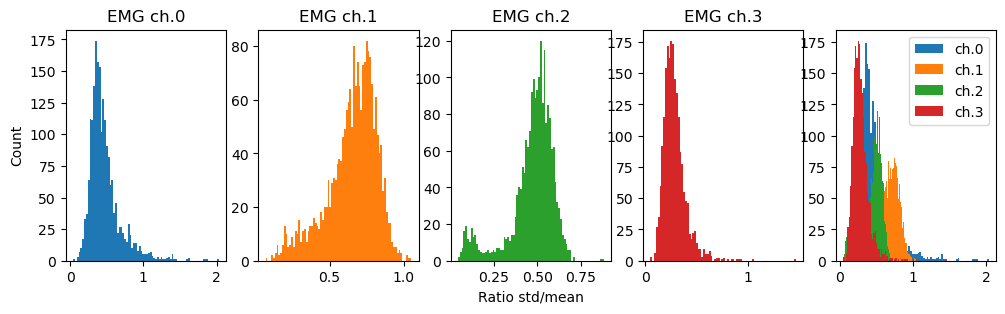

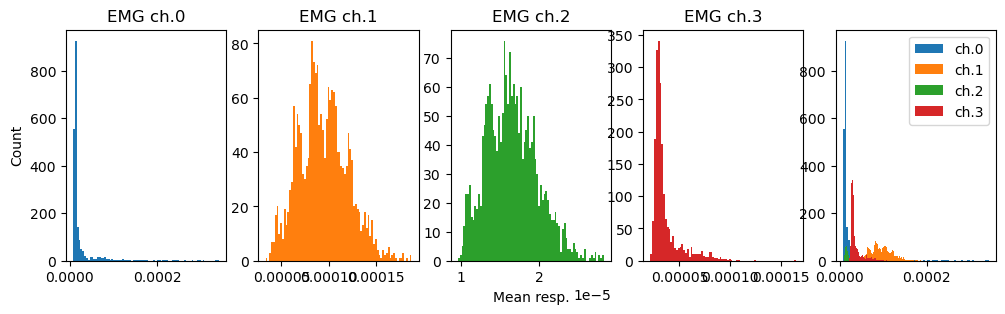

In [16]:
fig, ax = plt.subplots(1,5, figsize=(12,3))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
n_bins = 80

for i in range(resp_mu.shape[0]):
    
    ax[i].hist(ratio[i], bins=n_bins, color = colors[i])
    #ax[i].set_xlim([0,2])
    ax[4].hist(ratio[i], bins=n_bins, label = 'ch.'+str(i))
    ax[i].set_title('EMG ch.'+str(i))

ax[2].set_xlabel('Ratio std/mean')
ax[0].set_ylabel('Count')
ax[4].legend()
plt.show()


fig, ax = plt.subplots(1,5, figsize=(12,3))

for i in range(resp_mu.shape[0]):
    
    ax[i].hist(resp_mu[i], bins=n_bins, color = colors[i])
    #ax[i].set_xlim([0,0.00004])
    ax[4].hist(resp_mu[i], bins=n_bins, label = 'ch.'+str(i))
    ax[i].set_title('EMG ch.'+str(i))

ax[2].set_xlabel('Mean resp.')
ax[0].set_ylabel('Count')
ax[4].legend()
        

In [17]:
resp_std = np.std(resp,axis=0)
resp_mu = np.mean(resp,axis=0)
ratio = resp_std/resp_mu.max()

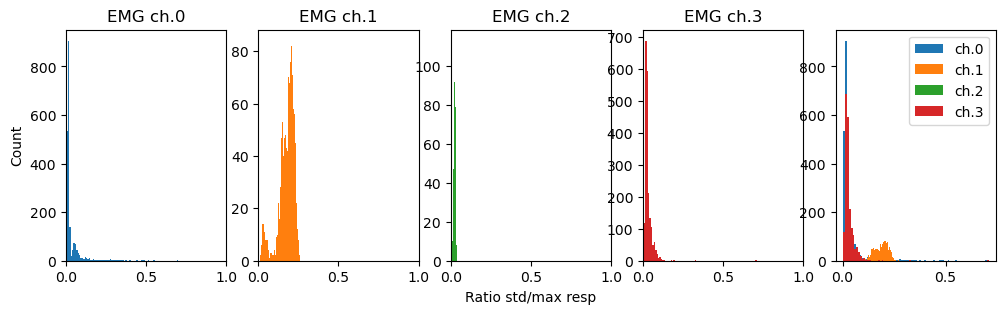

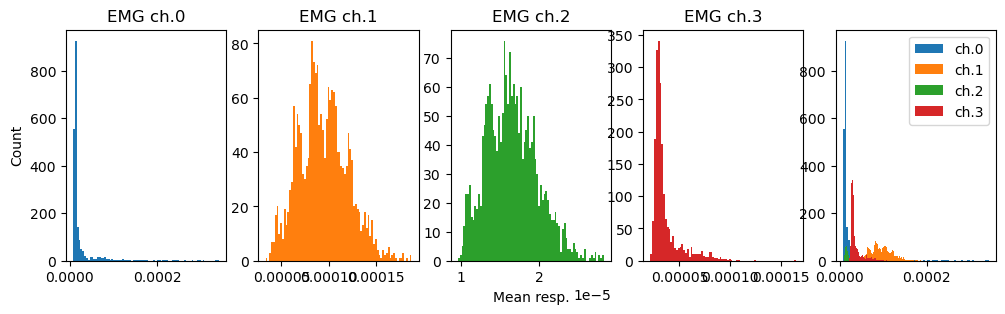

In [18]:
fig, ax = plt.subplots(1,5, figsize=(12,3))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
n_bins = 80

for i in range(resp_mu.shape[0]):
    
    ax[i].hist(ratio[i], bins=n_bins, color = colors[i])
    ax[i].set_xlim([0,1])
    ax[4].hist(ratio[i], bins=n_bins, label = 'ch.'+str(i))
    ax[i].set_title('EMG ch.'+str(i))

ax[2].set_xlabel('Ratio std/max resp')
ax[0].set_ylabel('Count')
ax[4].legend()
plt.show()


fig, ax = plt.subplots(1,5, figsize=(12,3))

for i in range(resp_mu.shape[0]):
    
    ax[i].hist(resp_mu[i], bins=n_bins, color = colors[i])
    #ax[i].set_xlim([0,0.00004])
    ax[4].hist(resp_mu[i], bins=n_bins, label = 'ch.'+str(i))
    ax[i].set_title('EMG ch.'+str(i))

ax[2].set_xlabel('Mean resp.')
ax[0].set_ylabel('Count')
ax[4].legend()
        

### Mapping gt

In [19]:
resp_mu = np.mean(resp,axis=0)
mean_map = np.zeros((4,4,4,4,8,4))

for e in range(resp.shape[1]):

    val_p0 = np.unique(param[:,0])
    val_p1 = np.unique(param[:,1])
    val_p2 = np.unique(param[:,2])
    val_ch = np.unique(param[:,4])

    for i in range(len(param)):

        idx_p0 = np.where(np.isclose(val_p0, param[i, 0]))[0][0]
        idx_p1 = np.where(np.isclose(val_p1, param[i, 1]))[0][0]
        idx_p2 = np.where(np.isclose(val_p2, param[i, 2]))[0][0]
        #idx_ch = int(np.where(np.isclose(val_ch,param[i, 4]))[0][0]-1)
        idx_ch = int(param[i, 4]-1)

        x_ch = ch2xy[idx_ch,0]
        y_ch = ch2xy[idx_ch,1]

        mean_map[e, idx_p0, idx_p1, idx_p2, x_ch, y_ch] = resp_mu[e,i]
        
print(mean_map.shape)

(4, 4, 4, 4, 8, 4)


In [20]:
def exp_plot_pw_dur(emg_ch, mean_map, f = 3):
    
    print('EMG channel selected: '+ str(emg_ch))

    fig, ax = plt.subplots(3,4)
    vmin = np.min(mean_map[emg_ch, :, f, :, :, :])
    vmax = np.max(mean_map[emg_ch, :, f, :, :, :])
    
    for i in range(3):
        
        for j in range(4):
        
            ax[i,j].imshow(mean_map[emg_ch, j, f, i, :, :], vmin=vmin, vmax=vmax)
            #ax[i,j].set_title('PW = '+str(int(np.round(val_p0[i]))))
            
    plt.tight_layout()


In [21]:
def exp_plot(emg_ch, mean_map, pw = 3 , f = 3, dur = 0):
    
    print('EMG channel selected: '+ str(emg_ch))

    fig, ax = plt.subplots(1,4, figsize=(10,3))
    vmin = np.min(mean_map[emg_ch, :, f, dur, :, :])
    vmax = np.max(mean_map[emg_ch, :, f, dur, :, :])
    for i in range(4):
        ax[i].imshow(mean_map[emg_ch, i, f, dur, :, :], vmin=vmin, vmax=vmax)
        ax[i].set_title('PW = '+str(int(np.round(val_p0[i]))))

    fig, ax = plt.subplots(1,4, figsize=(10,3))
    vmin = np.min(mean_map[emg_ch, pw, :, dur, :, :])
    vmax = np.max(mean_map[emg_ch, pw, :, dur, :, :])
    for i in range(4):
        ax[i].imshow(mean_map[emg_ch, pw, i, dur, :, :], vmin=vmin, vmax=vmax)
        ax[i].set_title('freq = '+str(int(np.round(val_p1[i]))))

    fig, ax = plt.subplots(1,4, figsize=(10,3))
    vmin = np.min(mean_map[emg_ch, pw, f, :, :, :])
    vmax = np.max(mean_map[emg_ch, pw, f, :, :, :])
    for i in range(4):
        ax[i].imshow(mean_map[emg_ch, pw, f, i, :, :], vmin=vmin, vmax=vmax)
        ax[i].set_title('dur. = '+str(int(np.round(val_p2[i]))))
    

EMG channel selected: 0


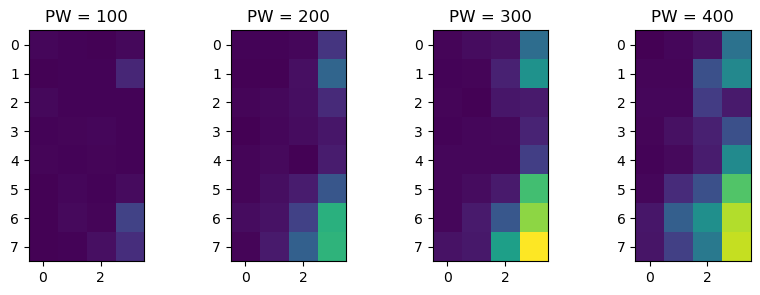

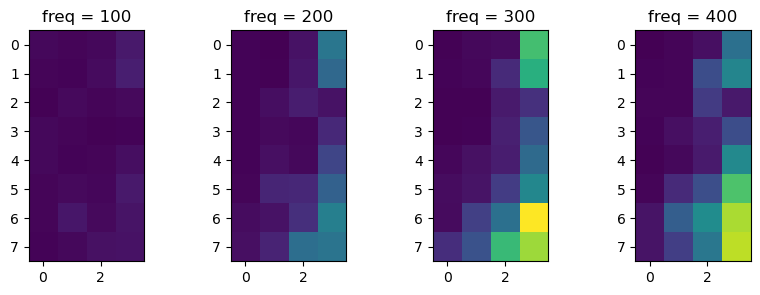

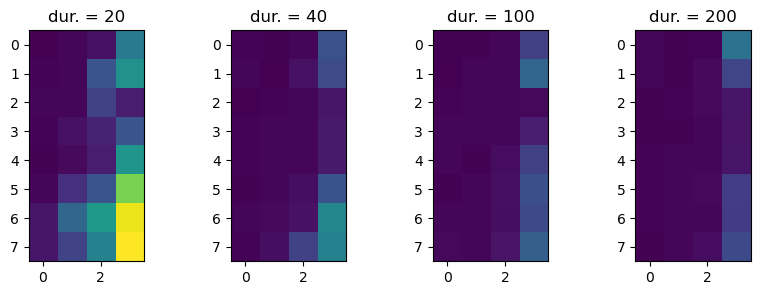

In [34]:
emg_ch =0
exp_plot(emg_ch, mean_map)

EMG channel selected: 1


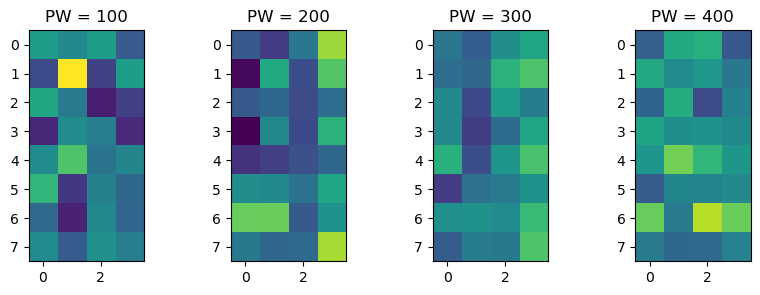

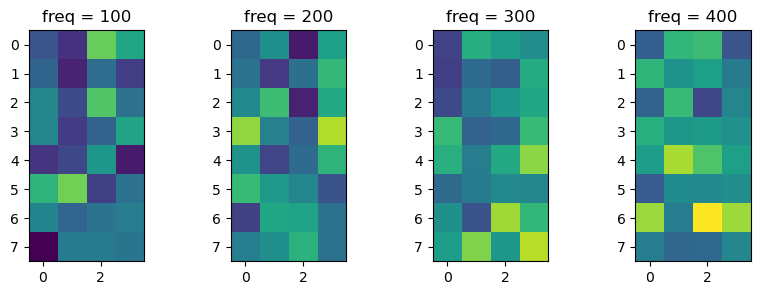

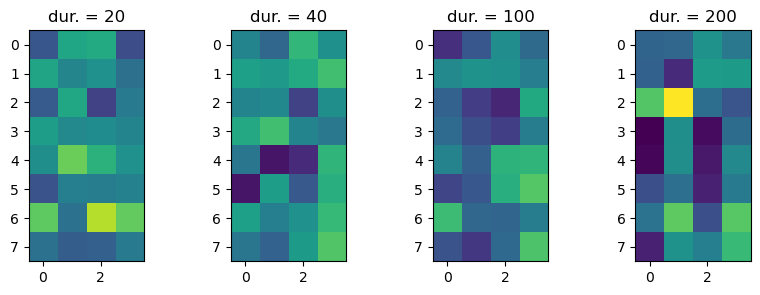

In [30]:
emg_ch =1
exp_plot(emg_ch, mean_map, dur =0)

EMG channel selected: 2


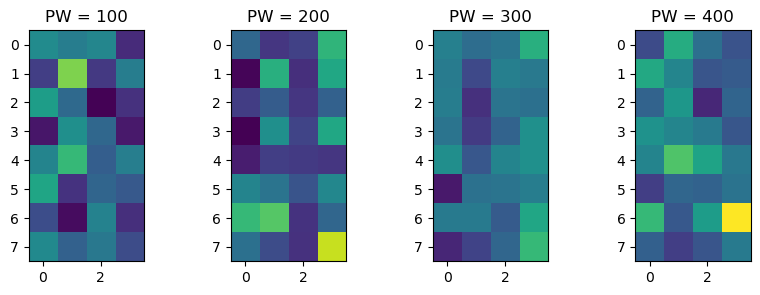

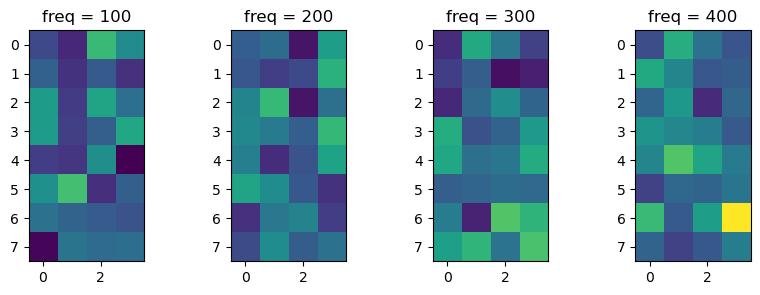

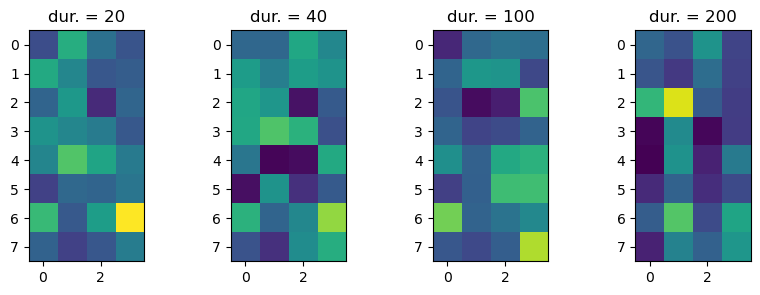

In [29]:
emg_ch =2
exp_plot(emg_ch, mean_map, dur=0)

EMG channel selected: 3


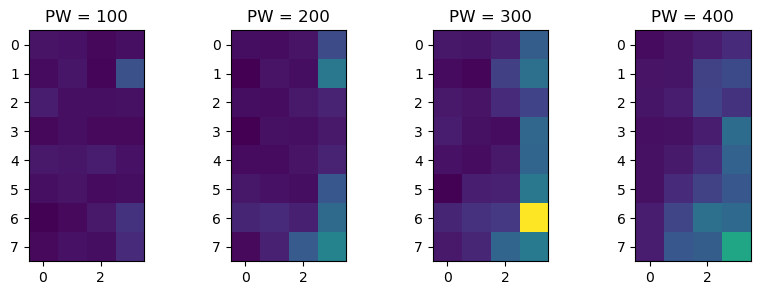

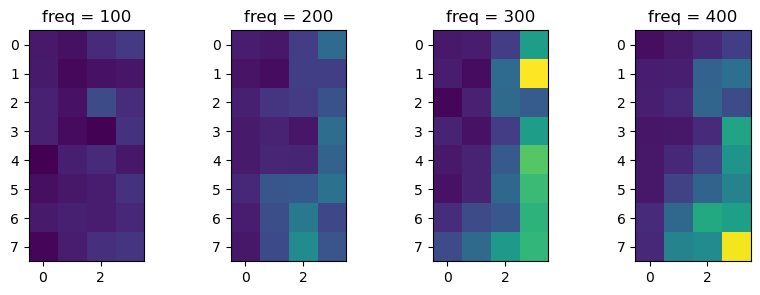

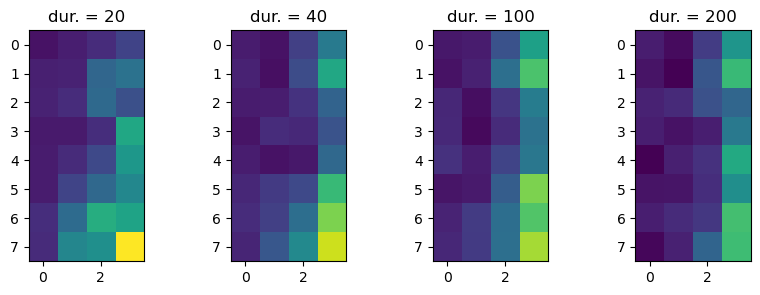

In [28]:
emg_ch =3
exp_plot(emg_ch, mean_map, dur =0)